### Data Cleaning

In [16]:
import pandas as pd

# Load the dataset
health_care_diabetes_data = pd.read_csv('health care diabetes.csv', encoding='ISO-8859-1')

# Filling missing values with mean or median where appropriate
health_care_diabetes_data['Glucose'].fillna(health_care_diabetes_data['Glucose'].mean(), inplace=True)
health_care_diabetes_data['BloodPressure'].fillna(health_care_diabetes_data['BloodPressure'].mean(), inplace=True)
health_care_diabetes_data['SkinThickness'].fillna(health_care_diabetes_data['SkinThickness'].median(), inplace=True)
health_care_diabetes_data['Insulin'].fillna(health_care_diabetes_data['Insulin'].median(), inplace=True)
health_care_diabetes_data['BMI'].fillna(health_care_diabetes_data['BMI'].median(), inplace=True)

# Create new feature Age Group 
health_care_diabetes_data['Age_Group'] = pd.cut(health_care_diabetes_data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Save the cleaned data
health_care_diabetes_data.to_csv('cleaned_diabetes.csv', index=False)

# Display cleaned dataset
health_care_diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6,148,72,35,0,33.6,0.627,50,1,40-50
1,1,85,66,29,0,26.6,0.351,31,0,30-40
2,8,183,64,0,0,23.3,0.672,32,1,30-40
3,1,89,66,23,94,28.1,0.167,21,0,20-30
4,0,137,40,35,168,43.1,2.288,33,1,30-40


In [10]:
# Summary statistics
summary_stats = health_care_diabetes_data.describe()

summary_stats


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Aggregating data by age group and outcome
age_group_outcome = health_care_diabetes_data.groupby(['Age_Group', 'Outcome']).size().unstack()

age_group_outcome



Outcome,0,1
Age_Group,,
20-30,327,90
30-40,81,76
40-50,49,64
50-60,23,31
60-70,18,7
70-80,1,0


### Data Viz

#### Glucose Levels Distribution

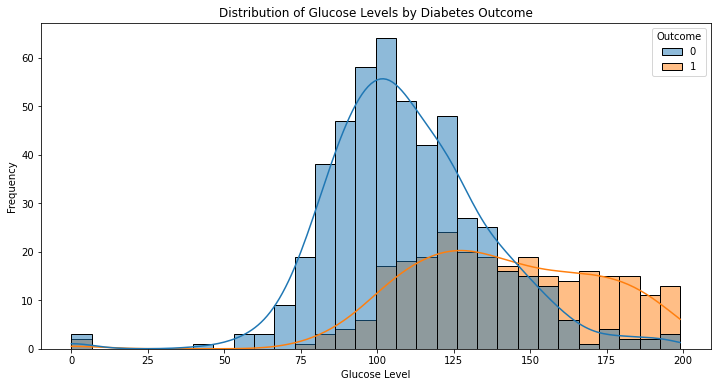

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=health_care_diabetes_data, x='Glucose', hue='Outcome', kde=True, bins=30)
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


#### Age Distribution

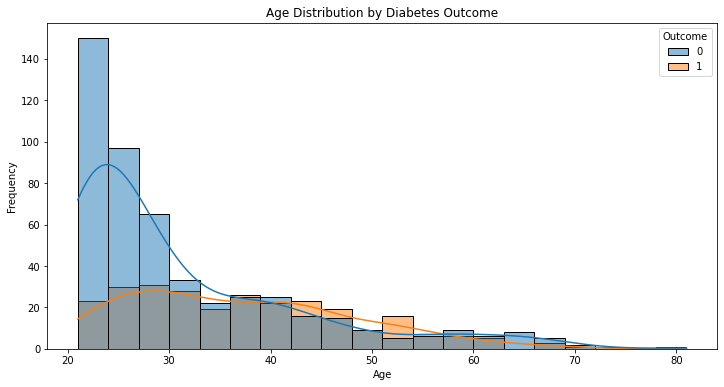

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=health_care_diabetes_data, x='Age', hue='Outcome', kde=True, bins=20)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### BMI and Diabetes Pedigree Function

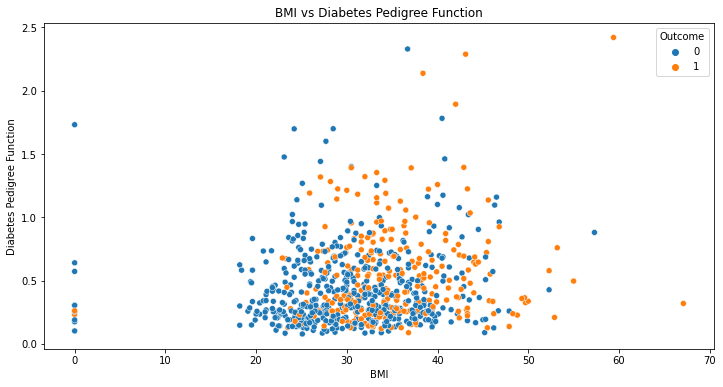

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=health_care_diabetes_data, x='BMI', y='DiabetesPedigreeFunction', hue='Outcome')
plt.title('BMI vs Diabetes Pedigree Function')
plt.xlabel('BMI')
plt.ylabel('Diabetes Pedigree Function')
plt.show()


 ### Age Group vs. Outcome

<Figure size 864x432 with 0 Axes>

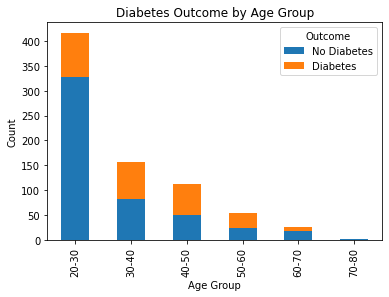

In [15]:
plt.figure(figsize=(12, 6))
age_group_outcome.plot(kind='bar', stacked=True)
plt.title('Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()
